### A/B Testing 

Dataset used: Marketing A/B Testing from Kaggle 
- Objective: To view the visual elements and run statistical tests 

Columns in dataset:
- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads


In [ ]:
# Import basic libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

Importing the dataset 

In [10]:
df = pd.read_csv(r"C:\Users\basbh\Documents\Projects\AB_Testing\marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [11]:
# Check for duplicated user id
df.duplicated(subset='user id').sum()

0

- "Unnamed: 0" column will not be used for any predictor anywhere 
- "user id" column will not be any use to predict anything 

In [12]:
#Drop unwanted columns (drop the index number column and user id column as they will not be the predictor of anything)
df.drop(['Unnamed: 0','user id'],axis=1,inplace=True)

In [13]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
# Check if the categorical group have appropriate number of data
# Create a data frame. (most ads hour is the time in 24 hour format)
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique() # Check number of unique categories 

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [15]:
# Check if the categorical varaibles have appropriate data
for i in df_cat:
    print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Univariate Analysis
- Visualise each variable 

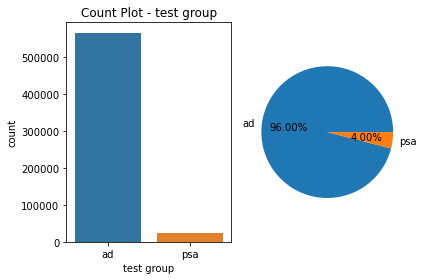

In [16]:
variable = 'test group'

plt.figure(figsize= (6,4)) # Setting up figure size
# Count plot 
plt.subplot(1,2,1) # placing 2 plots side by side 
sns.countplot(x=variable,data=df_cat)
plt.title (f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')

plt.tight_layout()

plt.show()

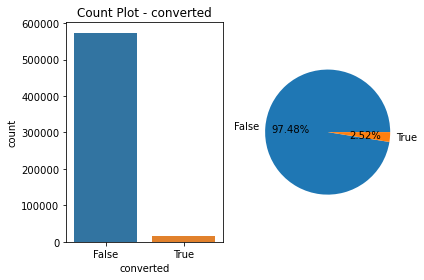

In [17]:
variable = 'converted'

plt.figure(figsize= (6,4)) # Setting up figure size
# Count plot 
plt.subplot(1,2,1) # placing 2 plots side by side 
sns.countplot(x=variable,data=df_cat)
plt.title (f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')

plt.tight_layout()

plt.show()

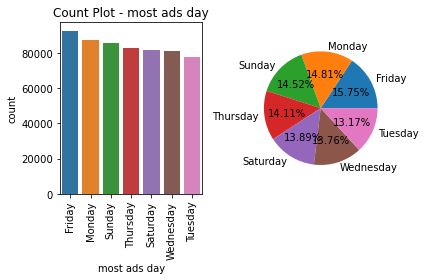

In [18]:
variable = 'most ads day'

plt.figure(figsize= (6,4)) # Setting up figure size
# Count plot 
plt.subplot(1,2,1) # placing 2 plots side by side 
sns.countplot(x=variable,data=df_cat,order=df_cat['most ads day'].value_counts().index)
#.value_counts() gives it in descending order
plt.title (f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')

plt.tight_layout()

plt.show()

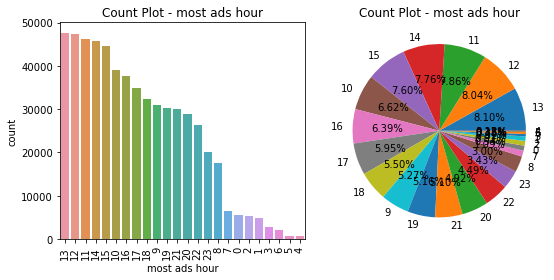

In [19]:
variable = 'most ads hour'

plt.figure(figsize= (8,4)) # Setting up figure size
# Count plot 
plt.subplot(1,2,1) # placing 2 plots side by side 
sns.countplot(x=variable,data=df_cat,order=df_cat['most ads hour'].value_counts().index)
#.value_counts() gives it in descending order
plt.title (f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title (f'Count Plot - {variable}')

plt.tight_layout()

plt.show()

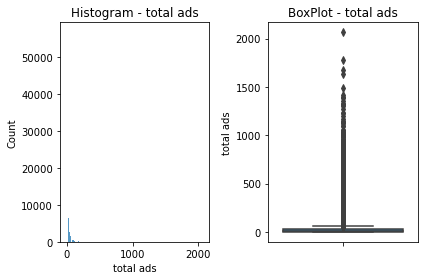

In [20]:
variable = 'total ads'

plt.figure(figsize= (6,4)) # Setting up figure size
# Count plot 
plt.subplot(1,2,1) # placing 2 plots side by side 
sns.histplot(x=variable,data=df)
#.value_counts() gives it in descending order
plt.title (f'Histogram - {variable}')


#Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y = variable , data=df)
plt.title (f'BoxPlot - {variable}')

plt.tight_layout()

plt.show()


In [21]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

After determining the quantiles, we filter the columns to get a better visualisation. Filering toal ads that are less than 50

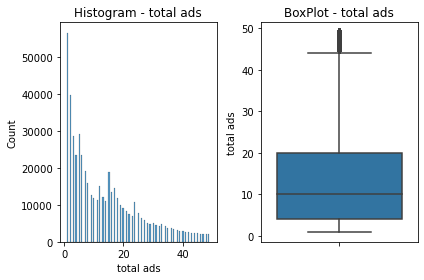

In [22]:
variable = 'total ads'

plt.figure(figsize= (6,4)) # Setting up figure size
# Count plot 
plt.subplot(1,2,1) # placing 2 plots side by side 
sns.histplot(x=variable,data=df[df['total ads']<50])
#.value_counts() gives it in descending order
plt.title (f'Histogram - {variable}')


#Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y = variable , data=df[df['total ads']<50])
plt.title (f'BoxPlot - {variable}')

plt.tight_layout()

plt.show()


Median on the boxplot is around 10 ads 

### Bivariate Analysis
- Pair everything with the target column 

In [23]:
df.columns 

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [24]:
# When pairing two categorical variables, the general idea is to create a cross tab
# Cross tab taking 2 categorical variables and one variable will always be the target column
# Normalizing it means dividing by the row total 
ct_conversion_test_group = pd.crosstab(df['test group'],df['converted'],normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


Of all people who have seen the ad, only 2.5% have purchased
Of people who have seen the psa, only 1.7% have purchased 

<AxesSubplot:xlabel='test group'>

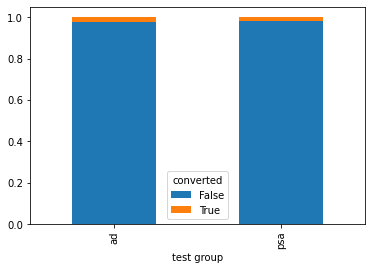

In [ ]:
# Create visualisation from the top 
ct_conversion_test_group.plot.bar(stacked=True)

converted        False      True
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<AxesSubplot:xlabel='most ads day'>

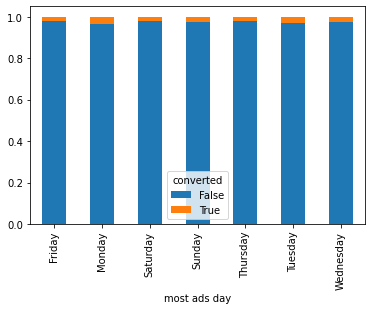

In [26]:
ct_conversion_day = pd.crosstab(df['most ads day'],df['converted'],normalize='index')
# 7 days a week sorted in ascending order
print(ct_conversion_day.sort_values(by =True,ascending=False))
ct_conversion_day.plot.bar(stacked = True)

converted         False      True
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<AxesSubplot:xlabel='most ads hour'>

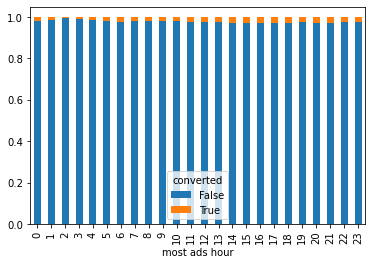

In [27]:
ct_conversion_hour= pd.crosstab(df['most ads hour'],df['converted'],normalize='index')
print(ct_conversion_hour.sort_values(by =True,ascending=False))
ct_conversion_hour.plot.bar(stacked = True) 

<AxesSubplot:xlabel='converted', ylabel='total ads'>

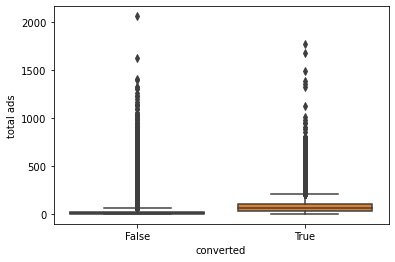

In [28]:
sns.boxplot(x = 'converted',y='total ads',data=df)

Reduce the interval 

<AxesSubplot:xlabel='converted', ylabel='total ads'>

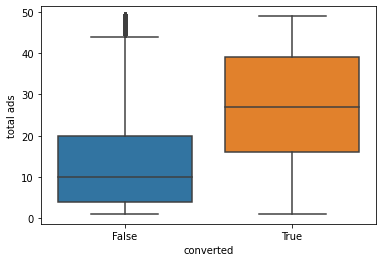

In [29]:
sns.boxplot(x = 'converted',y='total ads',data=df[df['total ads']<50])

Median number of ads when people have purchased the product is around 25 whilist the people who did not purchase the product is around 10. The different number of times the ads were shown to people could also affect whether or not they purchased(conversion)

## Statistical tests

When there are 2 categorical variables and their dependency, we will perform chi^2 test. Our target column which is "conversion status" is categorical (True/ False). We will pair this variable with converted and other categorical features 

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.5 
for variable in df_cat.columns:
    if variable != 'converted': # Not pairing the target categorical column with itself 
        # Create a contingency table (cross-tabulation)
        contingency_table = pd.crosstab(df_cat[variable],df_cat['converted'])

        # Perform chi-squared test
        # Returns multiple outputs: test statistic, p value, degree of freedom,expected frequency
        chi2,p,_,_ = chi2_contingency(contingency_table)

        #Display the results 
        print(f"\nChi-squared test for {variable} vs converted: ")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}") 

        #Check for significance 
        if p<alpha: # If P value is less than alpha(level of significance) 
            # Means showing the ad makes a difference 
            print(f"The difference in conversion rates across {variable} is statistically significant.") 
        else: 
            # Showing the ad doesnt make a differnce 
            print(f"There is no significant difference in conversion rates across{variable}") 


Chi-squared test for test group vs converted: 
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs converted: 
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs converted: 
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


e-13 means 10^(-13) 
e-85 means 10^(-85) 
Results 
- If the p-value is between 0 and 1, it indicates that the strength of evidence against the null hypothesis (Meaning showing ads  does not make a difference) 
- A smaller P value than the alpha indicates a stronger evidence that the null hypothesis is false (Meaning showing ads makes a difference) 
- Showing the ad makes a difference 
- Output proves that conversion rate Depends on what day of the week the ads are being shown
- When you're showing the ad throughout the day makes a difference (Focus on certain hours)



##  Performing test between Numerical variable and converted column

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu 

# Step 1 : Check Assumptions 
# Normality assumption
# Segregated by the total number of ads seen by people who have converted 
shapiro_stat_true,shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
# sample for people who have not converted, whats the distribution of the total number of ads seen by them 
shapiro_stat_false,shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

# Indicates wether true and false are normality distributed or not 
print(f"Shapiro-Wilk test for normality (True Group): p-vlaue = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False Group): p-vlaue = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'],df [~df['converted']]['total ads'])
#[~df['converted'] = False
# df['converted'] = True 
print(f"Levene's test for equality of variances:p-value - {levene_p_value}")


Shapiro-Wilk test for normality (True Group): p-vlaue = 0.0
Shapiro-Wilk test for normality (False Group): p-vlaue = 0.0
Levene's test for equality of variances:p-value - 0.0


In [ ]:
# Step 2: Perform a Suitable Test 
alpha = 0.05 

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha: # If both assumptions are normally distributed
    # Assumptions met - use t-test for means 
    t_stat,t_p_value, = ttest_ind(df[df['converted']]['total ads'],df[~df['converted']]['total ads']) # Input the case of true and false (distribution of total ads )
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    # Assumptions not met - use Mann-Whiteney U test for medians 
    u_stat, u_p_value, = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-Whiteney U test: p-value = {u_p_value}")

Mann-Whiteney U test: p-value = 0.0


- Assumptions that both converted groups are normally distributed are not satisfied in any of the shapiro-wilk test. P value of 0 does not indicate a normally distributed dataset.
- perform a Mann-Whiteney U test and the p value is 0 


Conclusion: All the factors played a part in whether or not the people purchased the product 